# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [32]:
!pip install folium

In [121]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [248]:
df = pd.read_csv('train.csv')
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [249]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
dropoff_datetime_col = df['dropoff_datetime']
df.drop('dropoff_datetime', axis = 1, inplace = True)

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

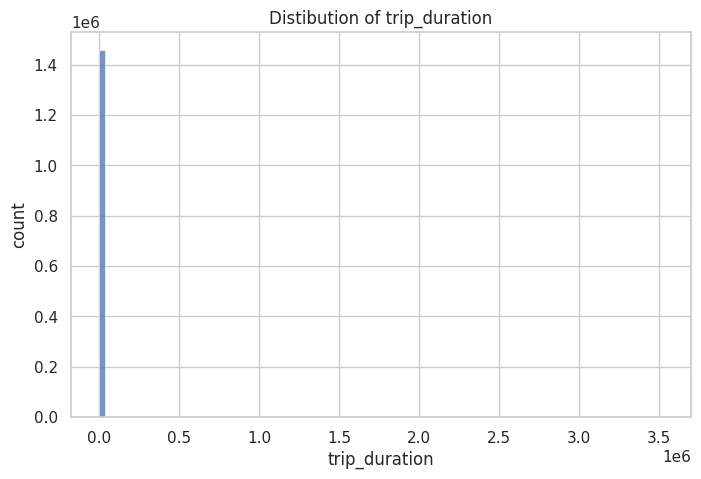

In [250]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df['trip_duration'], bins=100)
ax.set_xlabel('trip_duration')
ax.set_ylabel('count')
plt.title('Distibution of trip_duration')
plt.show()

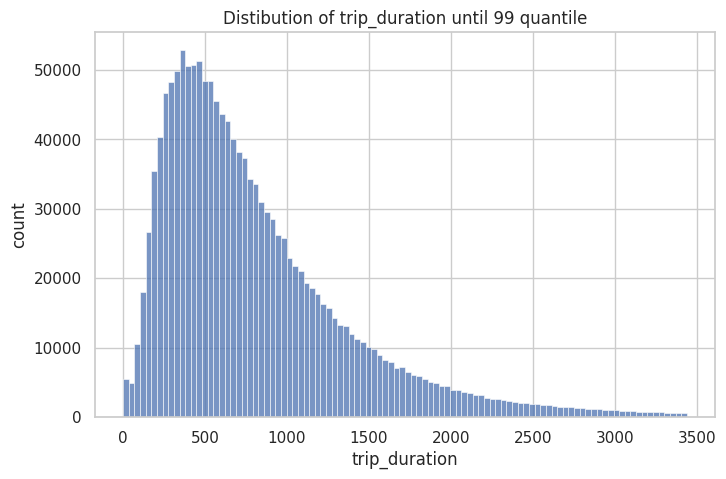

In [251]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df[df['trip_duration'] < df['trip_duration'].quantile(0.99)]['trip_duration'], bins=100)
ax.set_xlabel('trip_duration')
ax.set_ylabel('count')
plt.title('Distibution of trip_duration until 99 quantile')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Присутствуют выбросы. А в целом распределение похоже на лог-нормальное

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: Потому что распределение лог

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
$$
a(x_i) = \exp(\hat{a}(x_i)) - 1 \Rightarrow \hat{a}(x_i) = \log{a(x_i) + 1}
$$

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{l}\sum_{i=1}^{\ell}(\hat{y}_i - \hat{a}_i)^2} = \text{RMSE}(X, \hat{y}, \hat{a})
$$
А оптимизация RMSE эквивалентна оптимизации MSE, т.к. корень - монотонная функция
Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

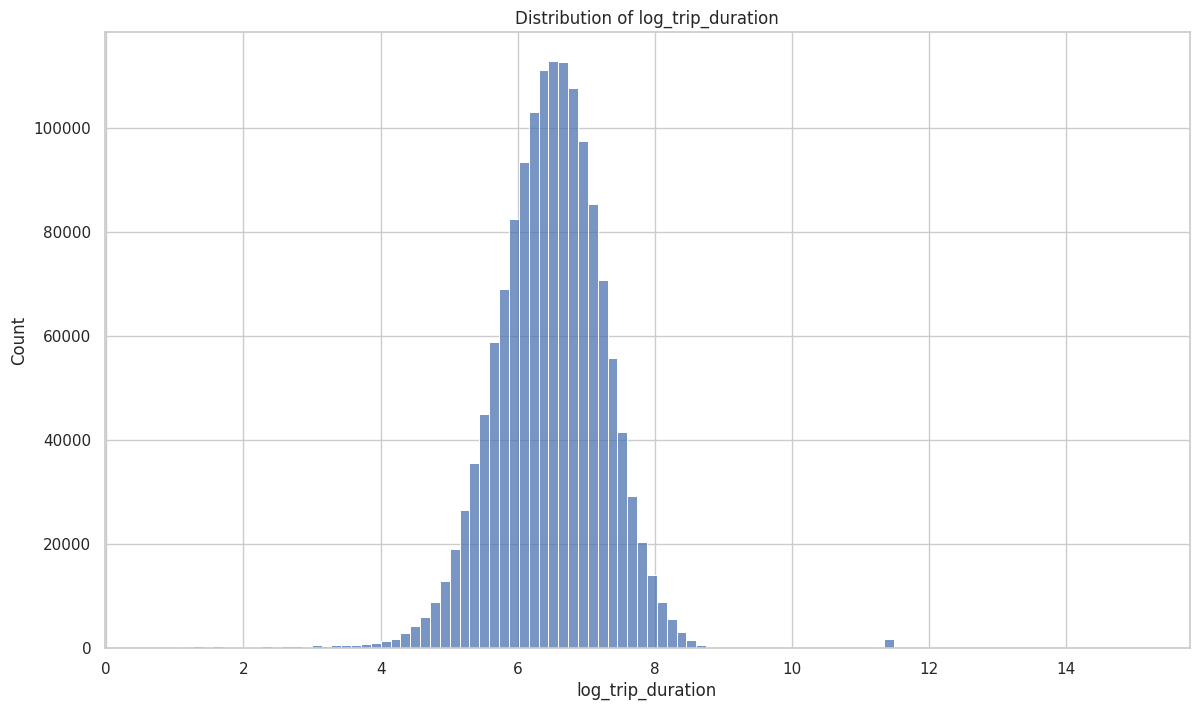

In [252]:
plt.figure(figsize = (14, 8))
df['log_trip_duration'] = np.log1p(df['trip_duration'])
sns.histplot(df['log_trip_duration'], bins = 100)
plt.title('Distribution of log_trip_duration')
plt.show()

In [253]:
df.drop('trip_duration', axis = 1, inplace = True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [132]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(((log1p_y_true - log1p_y_pred) ** 2).mean())

rmsle_best_const = rmsle(df['log_trip_duration'], (df['log_trip_duration'].mean()))

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

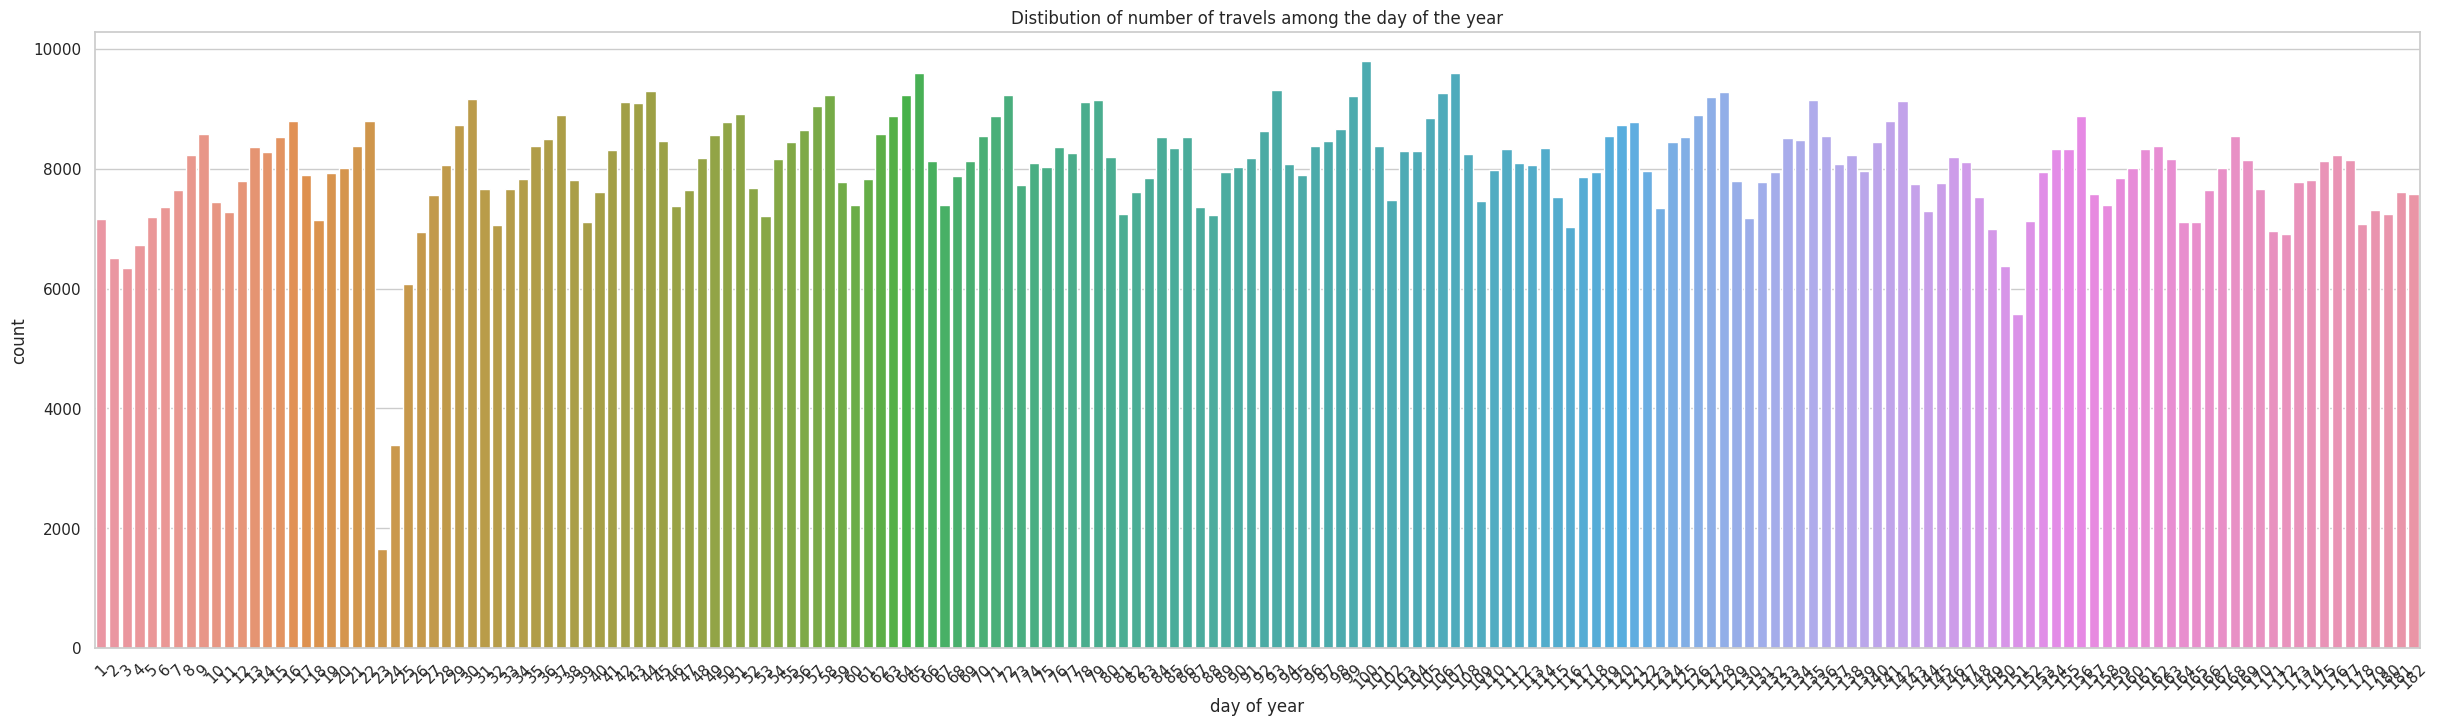

In [254]:
plt.figure(figsize = (30, 8))
sns.countplot(data = df, x = df['pickup_datetime'].dt.dayofyear)
plt.xticks(rotation=45)
plt.xlabel('day of year')
plt.title('Distibution of number of travels among the day of the year')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [255]:
df[df['pickup_datetime'].dt.dayofyear.isin(pd.DataFrame(df['pickup_datetime'].dt.dayofyear)['pickup_datetime'].value_counts().tail(2).index)]['pickup_datetime'].dt.date.unique()

array([datetime.date(2016, 1, 23), datetime.date(2016, 1, 24)],
      dtype=object)

В 11 штатах США был режим ЧП из-за аномальных снегопадов

<Figure size 1200x600 with 0 Axes>

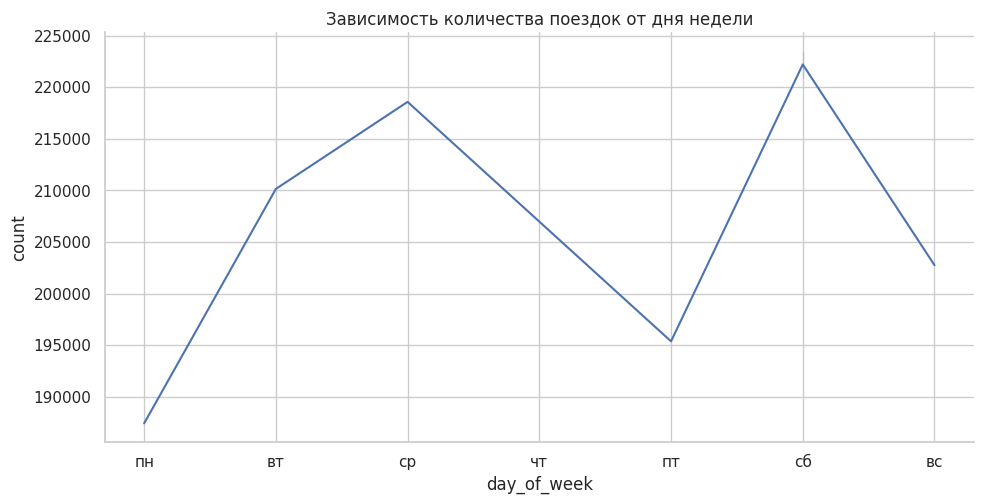

<Figure size 1200x600 with 0 Axes>

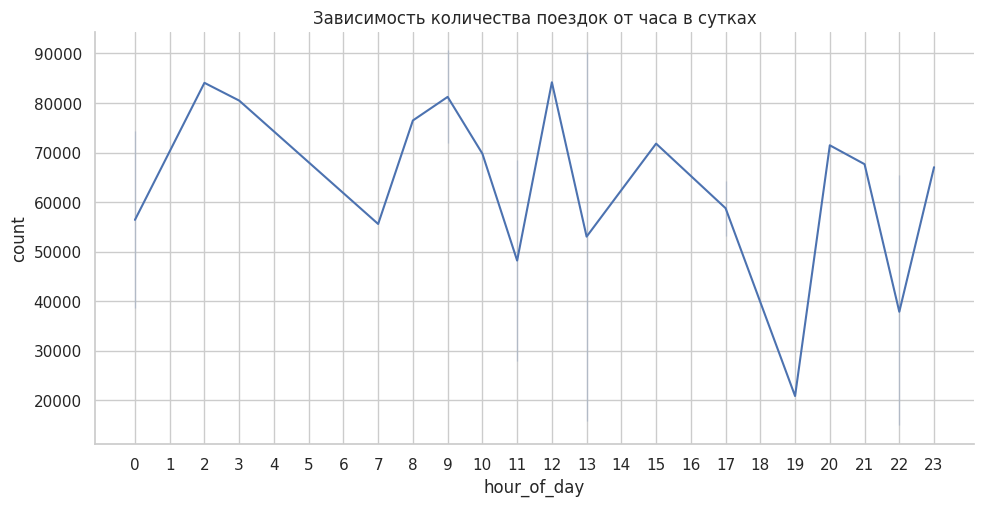

In [256]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['pickup_datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.relplot(data=df, x='day_of_week', y=df.groupby('day_of_week').size(), kind='line', aspect=2)
plt.title('Зависимость количества поездок от дня недели')
plt.ylabel('count')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])

plt.figure(figsize=(12, 6))
sns.relplot(data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='line', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках')
plt.ylabel('count')
plt.xticks(range(24))

plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

<Figure size 1200x600 with 0 Axes>

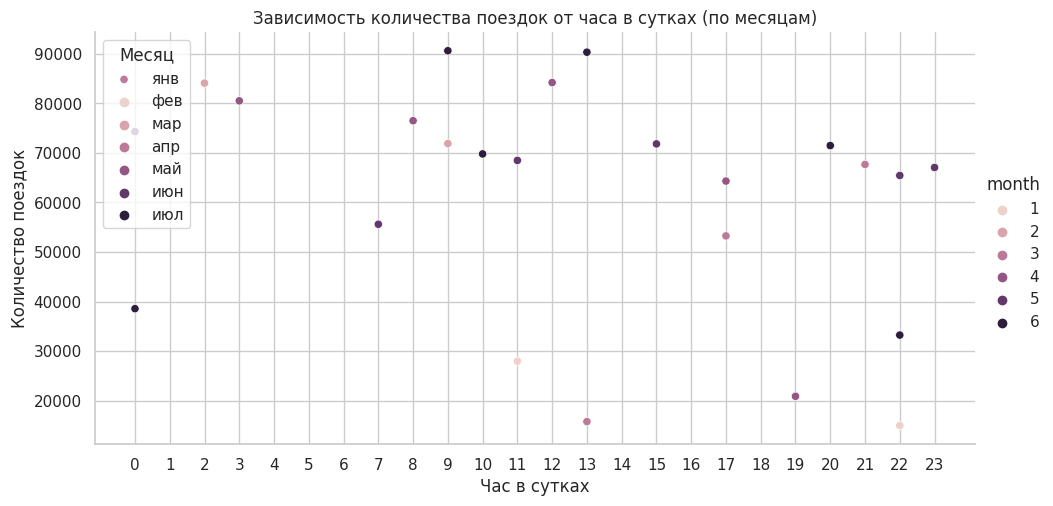

In [257]:
df['month'] = df['pickup_datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.relplot( data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='scatter', hue='month', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках (по месяцам)')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.legend(title='Месяц', labels=['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл'])

<Figure size 1200x600 with 0 Axes>

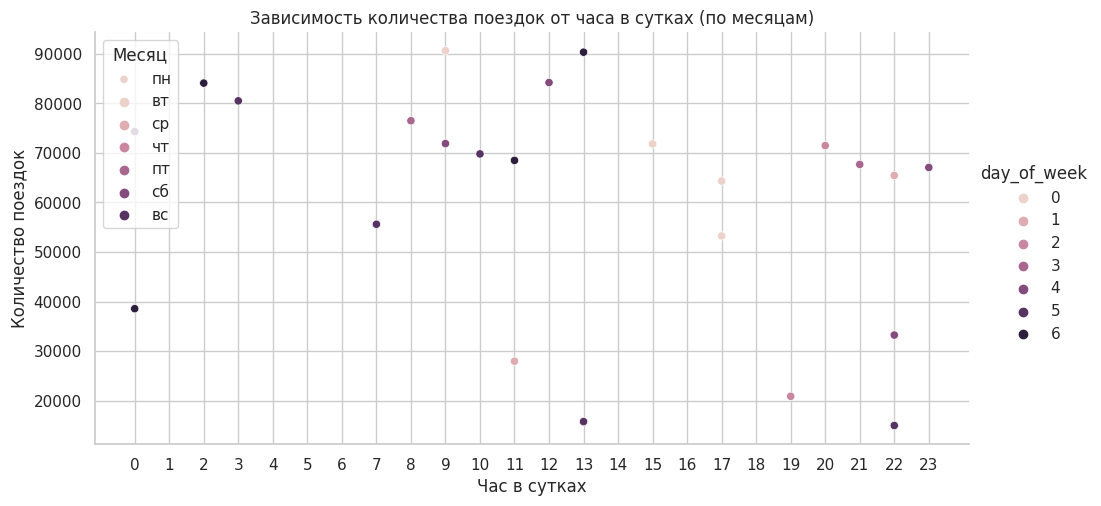

In [258]:
plt.figure(figsize=(12, 6))
sns.relplot( data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='scatter', hue='day_of_week', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках (по месяцам)')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.legend(title='Месяц', labels=['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Как можно видеть, больше всего поездок происходят в выходные, летом и где-то в середине дня - очень логично, потому что это самое удобное время для путешествий
****
**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [259]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df)

<Figure size 1200x600 with 0 Axes>

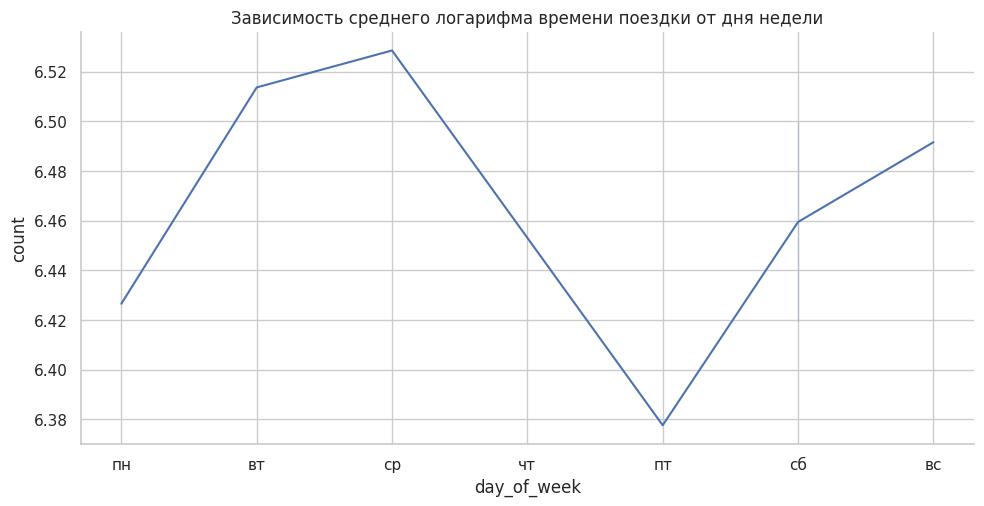

In [260]:
plt.figure(figsize=(12, 6))
sns.relplot(data=df_train, x='day_of_week', y=df.groupby('day_of_week')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.ylabel('count')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.show()

<Figure size 1200x600 with 0 Axes>

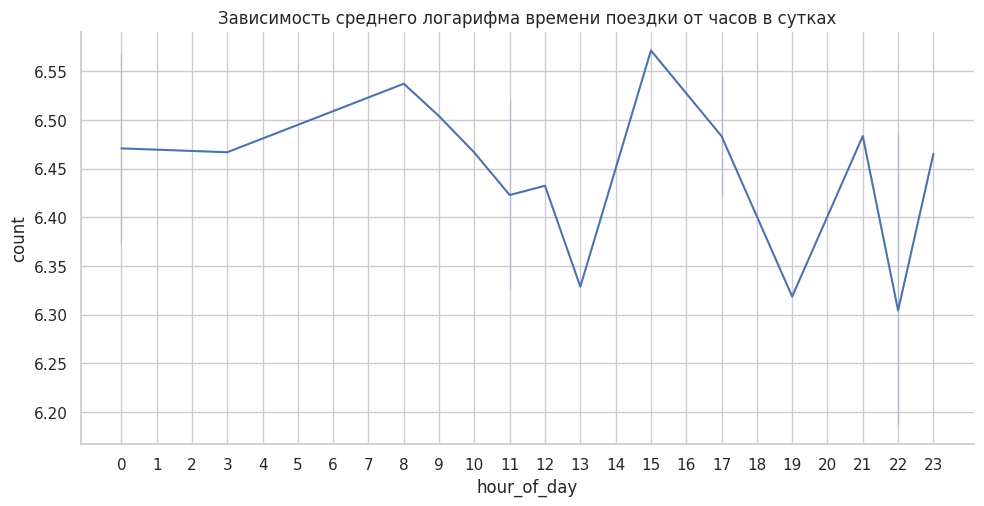

In [261]:
plt.figure(figsize=(12, 6))
sns.relplot(data=df_train, x='hour_of_day', y=df.groupby('hour_of_day')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от часов в сутках')
plt.ylabel('count')
plt.xticks(range(24))
plt.show()

<Figure size 3000x600 with 0 Axes>

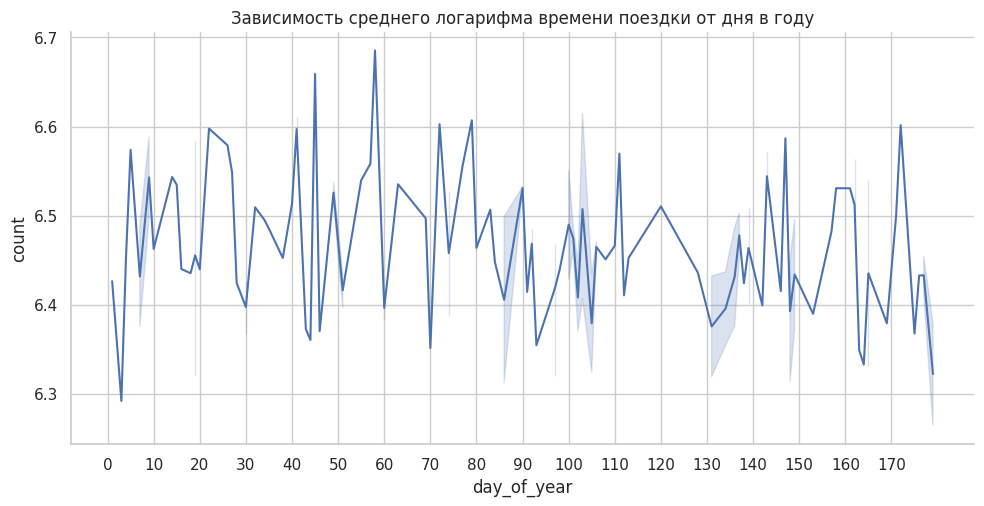

In [262]:
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear
plt.figure(figsize=(30, 6))
sns.relplot(data=df_train, x='day_of_year', y=df_train.groupby('day_of_year')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.ylabel('count')
plt.xticks(range(0, 180, 10))
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в
сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Да, графики таргета от дня недели и от часа немного похожи на аналогичные графики для количества поездок. У них схожий тренд, наверное чем больше люди ездят, тем более дольше длится поездка из-за высокой загруженности. Во время аномального периода продолжительность была наибольшая из-за снегопада, движение было затруднено, а также были ограничения на перемещения, и поэтому было слишком долгим.Сложно определить зависимость, присутствуют аномалии, но нет ярковыраженного тренда

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [263]:
df.drop(['day_of_week', 'hour_of_day', 'month'], axis = 1, inplace = True)

In [264]:
df['day_of_week'] = df['pickup_datetime'].dt.strftime('%A')
df['month'] = df['pickup_datetime'].dt.strftime('%B')
df['hour_of_day'] = df['pickup_datetime'].dt.hour
df['is_anomal'] = np.where(((df['pickup_datetime'].dt.day).isin([23, 24]) ) & (df['pickup_datetime'].dt.month == 1), 1, 0)
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour_of_day,is_anomal,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,Monday,March,17,0,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,Sunday,June,0,0,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,Tuesday,January,11,0,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,Wednesday,April,19,0,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,Saturday,March,13,0,86


In [265]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**:

Категориальные: day_of_week, month, hour_of_day, is_anomal- потому что они являются либо флажками (is_anomal), либо они представляют собой порядковый признак, которое имеет ограниченное небольшое число значений (day_of_week, month, hour_of_day - его в целом рекомендуют делать категориальным)

Численные: day_of_year - 180 значений, не хочется добавлять столько признаков потом

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [267]:
categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal']
numeric_features = ['day_of_year']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train[['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'day_of_year']], y_train)
y_pred = model.predict(X_test[['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'day_of_year']])
model

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'month',
                                                   'hour_of_day',
                                                   'is_anomal']),
                                                 ('scaling', StandardScaler(),
                                                  ['day_of_year'])])),
                ('regression', Ridge())])

In [268]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7883


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [269]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [270]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [271]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Выделяются точки в аэоропоратах, их нельзя отнести к выбросам, потому что они имеют логику, однако они сильно отличаются от основной массы точек, которая сосредоточена в Нью-Йорке. Наверное, в таких точкахпродолжительность поездке будет больше, чем в основной массе

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [272]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour_of_day,is_anomal,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,Monday,March,17,0,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,Sunday,June,0,0,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,Tuesday,January,11,0,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,Wednesday,April,19,0,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,Saturday,March,13,0,86


In [273]:
!pip install haversine
from haversine import haversine
def my_haversine(lat1, lon1, lat2, lon2):
  pickup = (lat1, lon1)
  dropoff = (lat2, lon2)
  return haversine(pickup, dropoff)
df['haversine'] = df.apply(lambda row: my_haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [274]:
df['log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [275]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

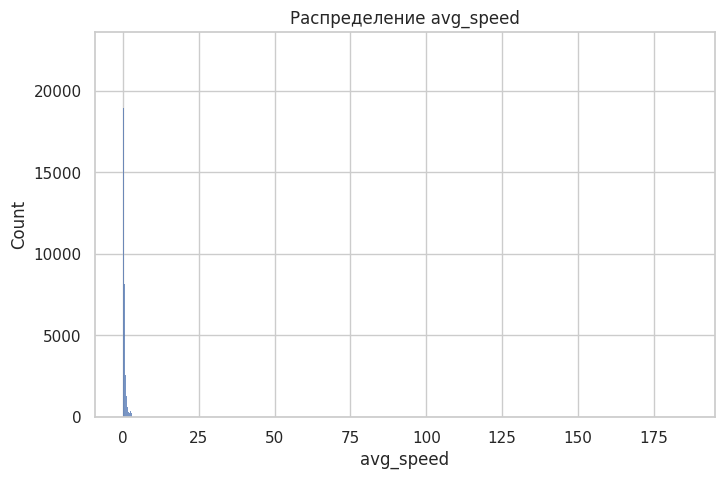

In [276]:
df['avg_speed'] = df['haversine'] / df['log_trip_duration']
plt.figure(figsize = (8, 5))
sns.histplot(df['avg_speed'])
plt.title('Распределение avg_speed')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

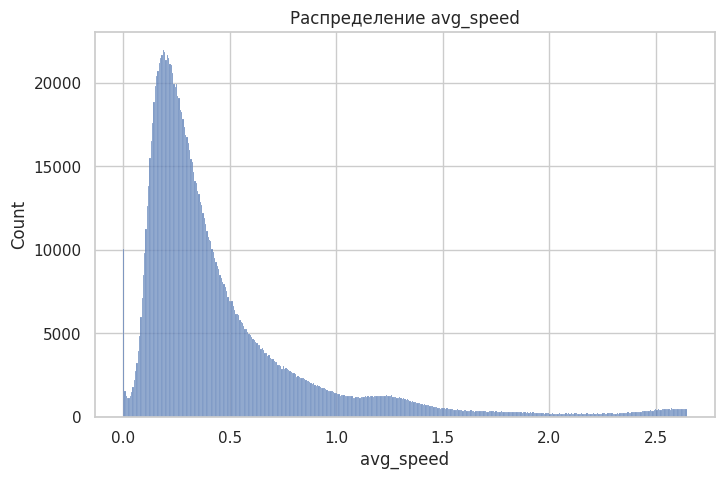

In [277]:
plt.figure(figsize = (8, 5))
sns.histplot(df[df['avg_speed'] <= np.quantile(df['avg_speed'], q = 0.99)]['avg_speed'])
plt.title('Распределение avg_speed')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [278]:
df_avg_speed = pd.DataFrame(df.groupby(['day_of_week', 'hour_of_day'])['avg_speed'].mean().unstack())
df_avg_speed

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,0.587652,0.597159,0.583455,0.611376,0.752356,0.801036,0.591580,0.474715,0.417382,0.409315,...,0.479377,0.474018,0.492702,0.455497,0.436538,0.431751,0.480121,0.492806,0.506994,0.532921
Monday,0.717047,0.689720,0.653773,0.705001,0.851672,0.824250,0.603001,0.506289,0.451326,0.436605,...,0.485350,0.484009,0.487406,0.466794,0.457154,0.471854,0.533407,0.557339,0.580672,0.649529
Saturday,0.536910,0.545591,0.545696,0.573082,0.659784,0.841164,0.764498,0.609515,0.524242,0.460437,...,0.458247,0.467501,0.457632,0.463708,0.438738,0.417424,0.456917,0.459790,0.476180,0.503539
Sunday,0.513369,0.528616,0.543019,0.578591,0.635644,0.807194,0.845932,0.700743,0.560385,0.505505,...,0.524387,0.535524,0.532038,0.531754,0.502480,0.512154,0.542442,0.574002,0.609945,0.668744
Thursday,0.609262,0.620955,0.622022,0.688500,0.777362,0.761889,0.566093,0.464137,0.408053,0.405468,...,0.477601,0.464806,0.489684,0.451068,0.440652,0.451620,0.502438,0.531060,0.545765,0.582779
Tuesday,0.666363,0.666176,0.646512,0.676533,0.806683,0.730087,0.541402,0.458541,0.400958,0.396328,...,0.457520,0.447533,0.474272,0.446423,0.427107,0.454133,0.504155,0.533066,0.570825,0.605334
Wednesday,0.622395,0.623205,0.601776,0.657037,0.763399,0.710505,0.553950,0.460305,0.409083,0.390846,...,0.451064,0.455922,0.482955,0.446718,0.424558,0.442629,0.510059,0.539454,0.551810,0.594113


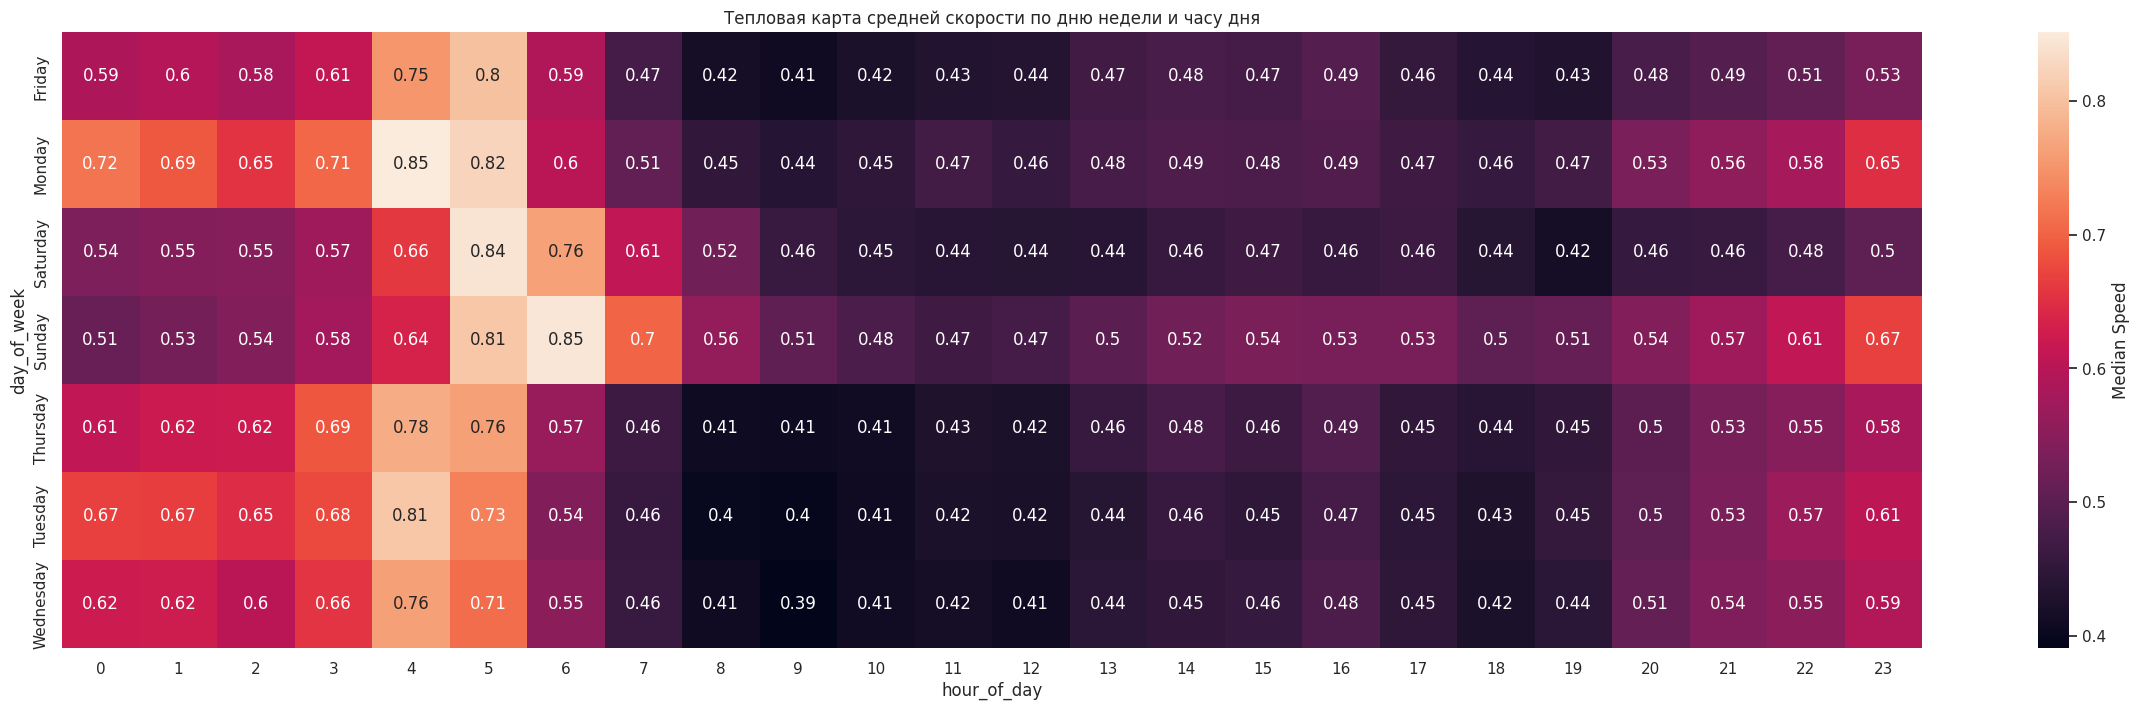

In [279]:
plt.figure(figsize = (30, 8))
sns.heatmap(df_avg_speed, annot=True, cbar_kws={'label': 'Median Speed'})
plt.title('Тепловая карта средней скорости по дню недели и часу дня')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: $ v = \frac{t}{s}$, т.е. мы будем иметь расстояние и скорость, предсказывая время, тогда модель будет бесмыссленна (мы скорость получили из данных, которые предсказываем)

In [280]:
df.drop('avg_speed', axis = 1, inplace = True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**:  Минимальная скорость c утра (8-12) и вечером в (18-19) в будни, а максаимальная с утра по выходным и в будни
****
Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [281]:
df['traffic_jam'] = np.where((df['hour_of_day'].isin([8, 9, 10, 11, 12]) & df['day_of_week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday']) | (df['hour_of_day'].isin([17, 18, 19]) & df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 1, 0)
df['free_road'] = np.where((df['hour_of_day'].isin([2, 3, 4, 5]) & df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) | (df['hour_of_day'].isin([5, 6, 7]) & df['day_of_week'].isin(['Saturday', 'Sunday'])), 1, 0)

In [282]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour_of_day,is_anomal,day_of_year,haversine,log_haversine,traffic_jam,free_road
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,Monday,March,17,0,74,1.498523,0.915700,1,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,Sunday,June,0,0,164,1.805510,1.031585,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,Tuesday,January,11,0,19,6.385107,1.999465,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,Wednesday,April,19,0,97,1.485500,0.910474,1,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,Saturday,March,13,0,86,1.188590,0.783258,0,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [283]:
df['pickup_JK_IntAirport'] = np.where((df['pickup_latitude'] <= 40.6623) & (df['pickup_latitude'] >= 40.6260) & (df['pickup_longitude'] <= -73.7687) & (df['pickup_longitude'] >= -73.8024), 1, 0)
df['dropoff_JK_IntAirport'] = np.where((df['dropoff_latitude'] <= 40.6623) & (df['dropoff_latitude'] >= 40.6260) & (df['dropoff_longitude'] <= -73.7687) & (df['dropoff_longitude'] >= -73.8024), 1, 0)
df['pickup_NYLiberti_Airport'] = np.where((df['pickup_latitude'] <= 40.7072) & (df['pickup_latitude'] >= 40.6704) & (df['pickup_longitude'] <= -74.1565) & (df['pickup_longitude'] >= -74.1903), 1, 0)
df['dropoff_NYLiberti_Airport'] = np.where((df['dropoff_latitude'] <= 40.7072) & (df['dropoff_latitude'] >= 40.6704) & (df['dropoff_longitude'] <= -74.1565) & (df['dropoff_longitude'] >= -74.1903), 1, 0)
df['pickup_LaGuardia_Airport'] = np.where((df['pickup_latitude'] <= 40.7839) & (df['pickup_latitude'] >= 40.7638) & (df['pickup_longitude'] <= -73.8597) & (df['pickup_longitude'] >= -73.88623), 1, 0)
df['dropoff_LaGuardia_Airport'] = np.where((df['dropoff_latitude'] <= 40.7839) & (df['dropoff_latitude'] >= 40.7638) & (df['dropoff_longitude'] <= -73.8597) & (df['dropoff_longitude'] >= -73.88623), 1, 0)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

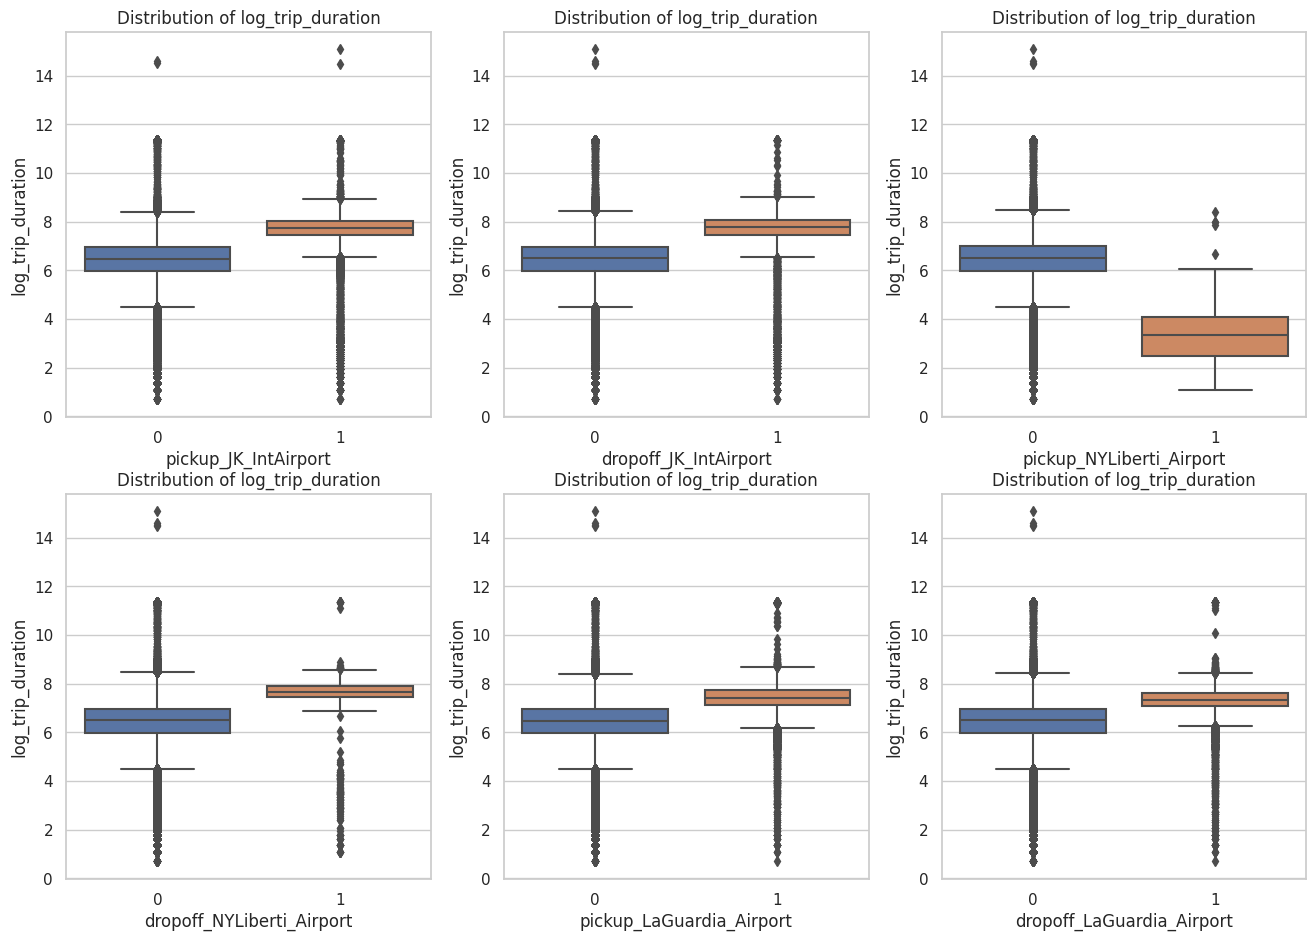

In [284]:
columns =  ['pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport']
fig, axes = plt.subplots(2, 3, figsize=(16, 11))
for i, column in enumerate(columns):  # Итерируйтесь по всем признакам, кроме логарифма времени поездки
    row, col = divmod(i, 3)
    sns.boxplot(y='log_trip_duration', x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title('Distribution of log_trip_duration')


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: очень хорошим получиля признак pickup_NYLiberti_Airport, потому что время поездки там сильно меньше, чем не там. И в целом везде видна разница, между нахождением в выбранном пункте и нет, но разница не сильная

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [285]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nrows, ncols):
        self.nrows = nrows
        self.ncols = ncols
        #self.width = width
        #self.height = height
        #self.width_of_sector = width / ncols
        #self.height_of_sector = height / nrows
        pass

    def show_map(self):
        return self.m

    def fit(self, X, y=None):
        self.max_lat = np.quantile(X['pickup_latitude'], 0.99)
        self.max_long = np.quantile(X['pickup_longitude'], 0.99)
        self.min_lat = np.quantile(X['pickup_latitude'], 0.01)
        self.min_long = np.quantile(X['pickup_longitude'], 0.01)
        self.height = self.max_lat - self.min_lat
        self.width = self.max_long - self.min_long
        self.sec_height = self.height / self.nrows
        self.sec_width = self.width / self.ncols

        return self

    def transform(self, X, y=None):
        X['pickup_sec'] = np.floor((X['pickup_latitude'] - self.min_lat) / self.sec_height) * self.ncols +  np.floor((X['pickup_longitude'] - self.min_long) / self.sec_width + 1)
        X['dropoff_sec'] = np.floor((X['dropoff_latitude'] - self.min_lat) / self.sec_width) * self.ncols +  np.floor((X['dropoff_longitude'] - self.min_long) / self.sec_width + 1)
        X['pickup_sec'] = np.where((X['pickup_sec'] > self.ncols * self.nrows) | (X['pickup_sec'] < 1), -1, X['pickup_sec'])
        X['dropoff_sec'] = np.where((X['dropoff_sec'] > self.ncols * self.nrows) | (X['dropoff_sec'] < 1), -1, X['dropoff_sec'])
        return X

In [286]:
transformer = MapGridTransformer(nrows = 4, ncols = 5)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [289]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'pickup_sec', 'dropoff_sec']
numeric_features = ['day_of_year']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'month',
                                                   'hour_of_day', 'is_anomal',
                                                   'pickup_sec',
                                                   'dropoff_sec']),
                                                 ('scaling', StandardScaler(),
                                                  ['day_of_year'])])),
                ('regression', Ridge())])

In [290]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7322


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.
Наверное, чем больше пассажиров, тем дольше поездка, а также нахождение в магазине должно влиять на продолжительность

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [292]:
df['vendor_id'].nunique()

2

In [293]:
df['passenger_count'].nunique()

10

In [294]:
df['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

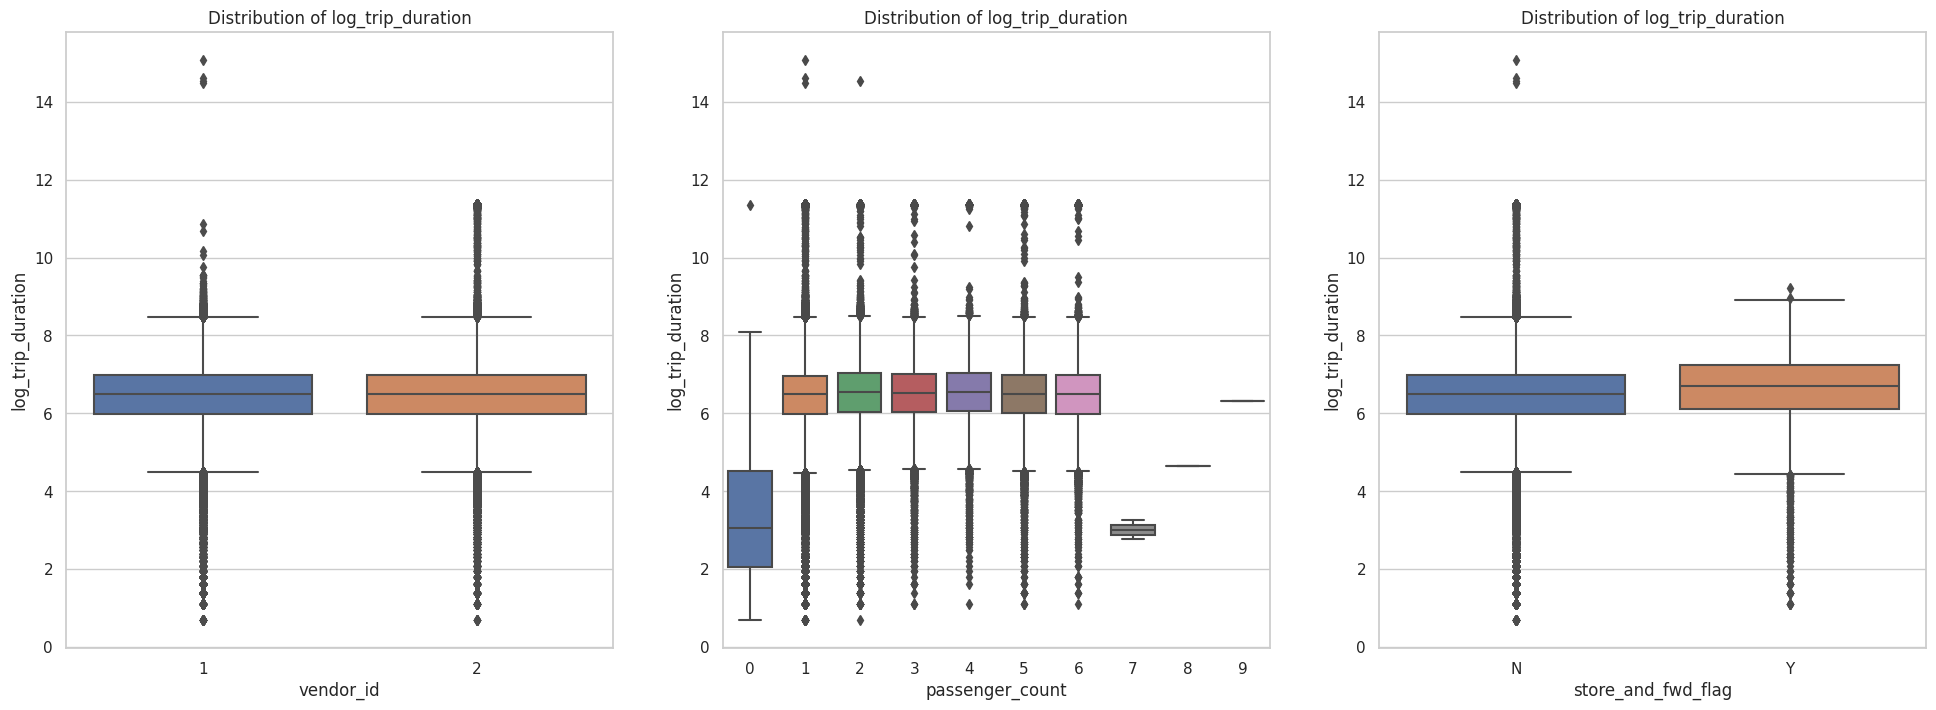

In [295]:
columns =  ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for i, column in enumerate(columns):  # Итерируйтесь по всем признакам, кроме логарифма времени поездки
    sns.boxplot(y='log_trip_duration', x=column, data=df, ax=axes[i])
    axes[i].set_title('Distribution of log_trip_duration')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [296]:
df['vendor_id'] = np.where(df['vendor_id'] == 1, 0, 1)
df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'] == 'N', 0, 1)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [299]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)

categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_sec', 'dropoff_sec']
numeric_features = ['day_of_year']
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'month',
                                                   'hour_of_day', 'is_anomal',
                                                   'vendor_id',
                                                   'store_and_fwd_flag',
                                                   'passenger_count',
                                                   'pickup_sec',
                                                   'dropoff_sec']),
                                                 ('scaling', StandardScaler(),
                                                  ['day_of_year'])])),
                ('regression', Ridge())])

In [300]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7314


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.


Метрика немножко улучшилась, давайте оставим

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или
outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

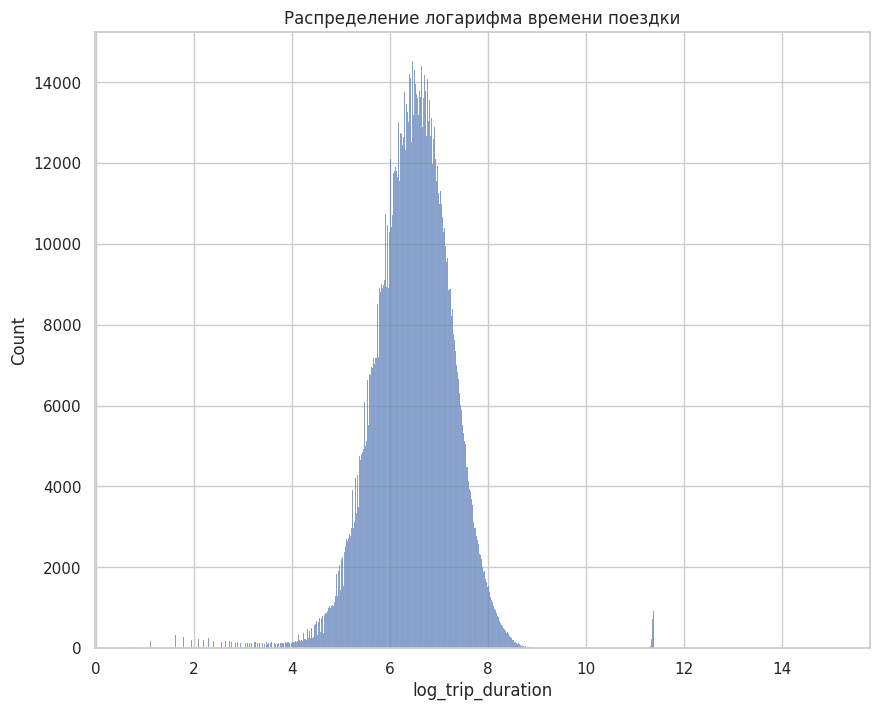

In [301]:
plt.figure(figsize = (10, 8))
sns.histplot(df['log_trip_duration'])
plt.title('Распределение логарифма времени поездки')
plt.show()

In [302]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_week', 'month', 'hour_of_day', 'is_anomal', 'day_of_year',
       'haversine', 'log_haversine', 'traffic_jam', 'free_road',
       'pickup_JK_IntAirport', 'dropoff_JK_IntAirport',
       'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport',
       'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport'],
      dtype='object')

In [303]:
#очистим по 0.5% самых больших и самых маленьких значений

print(f'0.5% квантиль: {np.quantile(df["log_trip_duration"], q = 0.005)}, 99.5% квантиль {np.quantile(df["log_trip_duration"], q = 0.995)}')
df = df[(df['log_trip_duration'] > np.quantile(df['log_trip_duration'], q = 0.005)) | (df['log_trip_duration'] < np.quantile(df['log_trip_duration'], q = 0.995))]
df.shape

0.5% квантиль: 3.9318256327243257, 99.5% квантиль 8.32845106681936


(1458644, 25)

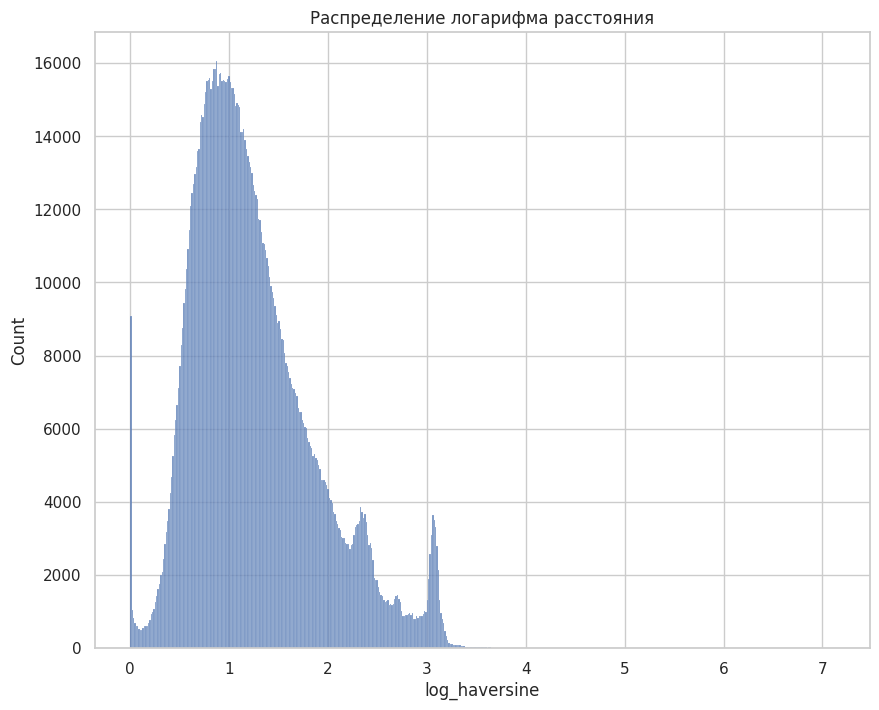

In [304]:
plt.figure(figsize = (10, 8))
sns.histplot(df['log_haversine'])
plt.title('Распределение логарифма расстояния')
plt.show()

In [305]:
#очистим 1% cамых больших наблюдений
print(f'99% квантиль:{np.quantile(df["log_haversine"], q = 0.99)}')
df = df[df['log_haversine'] <= np.quantile(df["log_haversine"], q = 0.99)]
df.shape

99% квантиль:3.0813386074962894


(1444057, 25)

Удалять занчения с сликшом большим остатком регрессии очень не хочется

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [306]:
df['hour_of_day'] = np.where((df['hour_of_day'] >= 0) & (df['hour_of_day'] <= 7), '0-7', df['hour_of_day'])

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [307]:
ohe = OneHotEncoder(handle_unknown="ignore")
categorical = ['day_of_week', 'month', 'hour_of_day', 'traffic_jam', 'is_anomal', 'free_road', 'pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']
print("Size before OneHot:", df.shape)
print("Size after OneHot:", (ohe.fit_transform(df[categorical])).shape)

Size before OneHot: (1444057, 25)
Size after OneHot: (1444057, 62)


$22 \rightarrow 48$

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [308]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
categorical = ['day_of_week', 'month', 'hour_of_day', 'traffic_jam', 'is_anomal', 'free_road', 'pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport', 'vendor_id', 'passenger_count', 'store_and_fwd_flag' , 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.7858


Lasso работает хуже чем Ridge

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [310]:
from tqdm import tqdm

In [323]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_val)
categorical = ['day_of_week', 'month', 'hour_of_day', 'traffic_jam', 'is_anomal', 'free_road', 'pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport', 'vendor_id', 'passenger_count', 'store_and_fwd_flag' , 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

In [324]:
lasso_mse = []
zeros = []
alphas = np.linspace(0.001, 0.1, 20)
for alpha in tqdm(alphas):
  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso(alpha = alpha))
  ])
  model = lasso_pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  zeros.append(np.sum(model.named_steps["regression"].coef_ == 0))
  lasso_mse.append( mean_squared_error(y_val, y_pred, squared=False))

100%|██████████| 20/20 [01:08<00:00,  3.43s/it]


In [316]:
ridge_mse = []
for alpha in tqdm(alphas):
  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Ridge(alpha = alpha))
  ])
  model = lasso_pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  ridge_mse.append( mean_squared_error(y_val, y_pred, squared=False))


100%|██████████| 20/20 [02:36<00:00,  7.84s/it]


In [317]:
print(f'regression: Lasso, optimal alpha: {alphas[np.argmin(lasso_mse)]}, minimal RMSE: {np.min(lasso_mse)}')
print(f'regression: Ridge, optimal alpha: {alphas[np.argmin(ridge_mse)]}, minimal RMSE: {np.min(ridge_mse)}')

regression: Lasso, optimal alpha: 0.001, minimal RMSE: 0.4808537686747165
regression: Ridge, optimal alpha: 0.04268421052631579, minimal RMSE: 0.4782559475292604


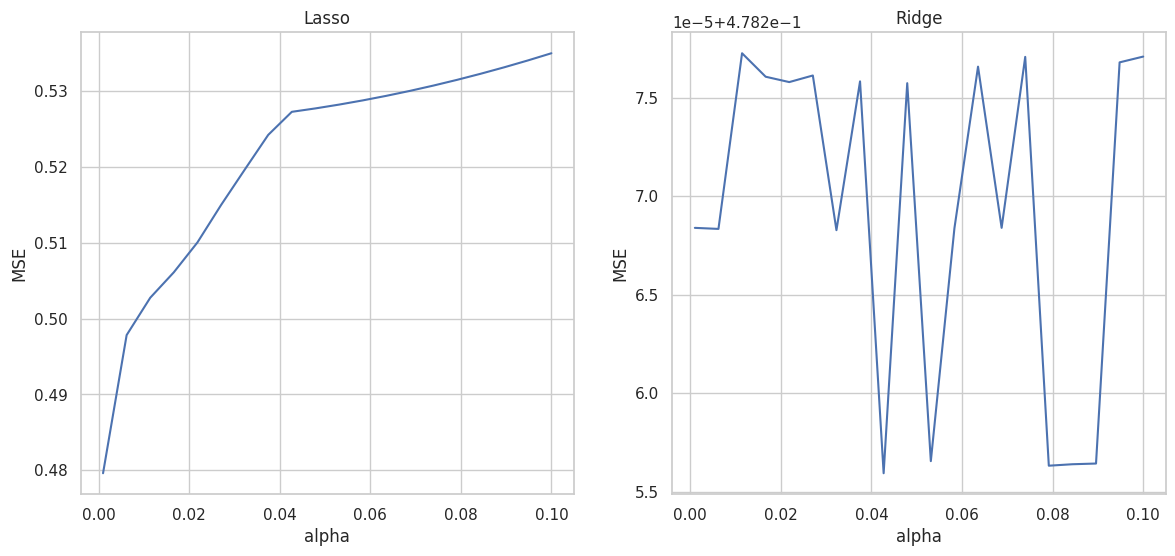

In [326]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_mse)
plt.title("Lasso")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_mse)
plt.title("Ridge")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

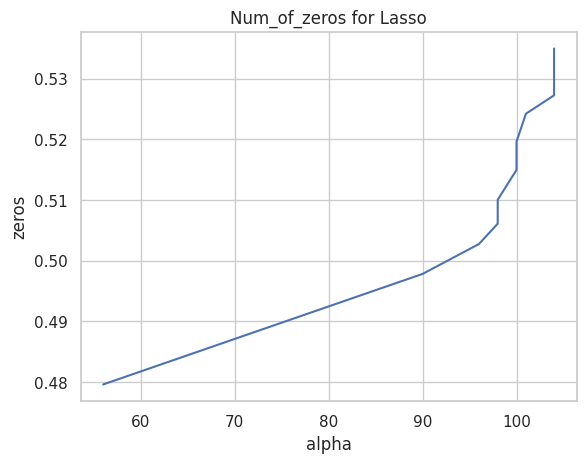

In [327]:
plt.plot(zeros, lasso_mse)
plt.title("Num_of_zeros for Lasso")
plt.xlabel('alpha')
plt.ylabel('zeros')
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Этот признак позволяет определить приблизительный путь, который проходится, т.е. можно учесть его особенности. Линейная модель не может вытащить это самостоятельно, т.к. может представить это как линейную комбинацию элементов, а здесь смотрим еще на линейные комбинации пар.

In [358]:
transformer.fit(df)
transformer.transform(df)
df['pair'] = list(zip(df['pickup_sec'], df['dropoff_sec']))

In [359]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,free_road,pickup_JK_IntAirport,dropoff_JK_IntAirport,pickup_NYLiberti_Airport,dropoff_NYLiberti_Airport,pickup_LaGuardia_Airport,dropoff_LaGuardia_Airport,pickup_sec,dropoff_sec,pair
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493,...,0,0,0,0,0,0,0,16.0,12.0,"(16.0, 12.0)"
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282,...,0,0,0,0,0,0,0,11.0,6.0,"(11.0, 6.0)"
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527,...,0,0,0,0,0,0,0,11.0,6.0,"(11.0, 6.0)"
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785,...,0,0,0,0,0,0,0,6.0,6.0,"(6.0, 6.0)"
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642,...,0,0,0,0,0,0,0,16.0,16.0,"(16.0, 16.0)"


In [372]:
df['pair'] = str(np.where(df['pair'].isin(list(df['pair'].value_counts().head(100).index)), df['pair'], -1))

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [373]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
categorical = ['day_of_week', 'month', 'hour_of_day', 'traffic_jam', 'is_anomal', 'free_road', 'pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport', 'vendor_id', 'passenger_count', 'store_and_fwd_flag' , 'pickup_sec', 'dropoff_sec', 'pair']
numeric_features = ['log_haversine', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.4796


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.